In [1]:
!pip install shap

In [2]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# SHAP
import shap

# Silence warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv("morgan_fingerprints.csv")
df = pd.read_csv("drd2_cleaned_dataset.csv")

y = df["pIC50"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (890, 990)
y shape: (890,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)

(712, 990) (178, 990)


In [5]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [6]:
explainer = shap.TreeExplainer(rf)

# Compute SHAP values on test set
shap_values = explainer.shap_values(X_test)

shap_values.shape

(178, 990)

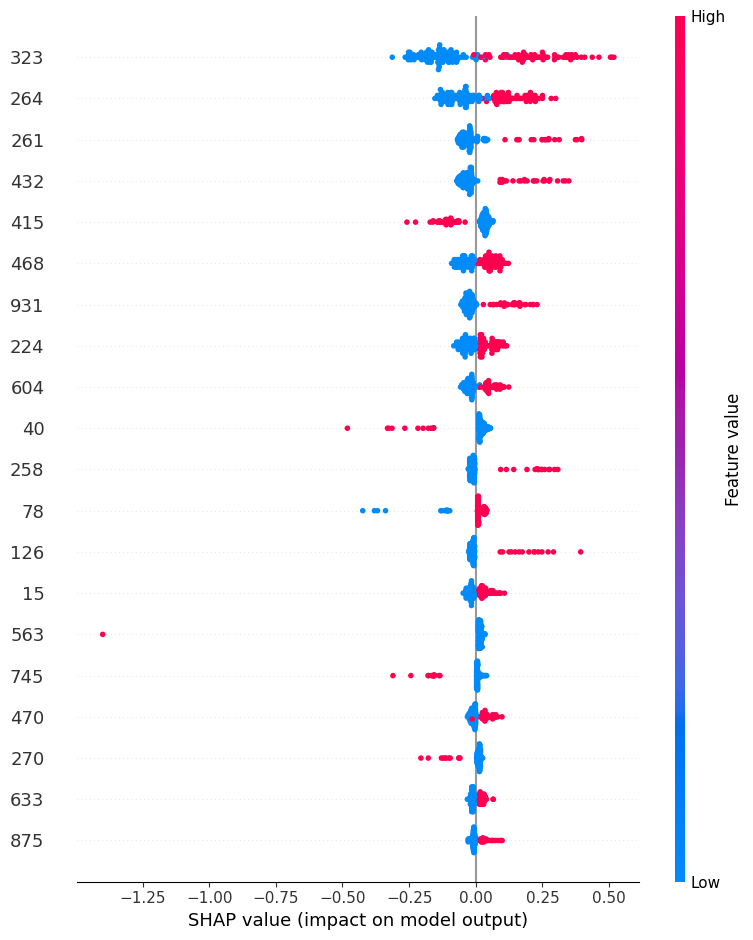

In [7]:
shap.summary_plot(shap_values, X_test)

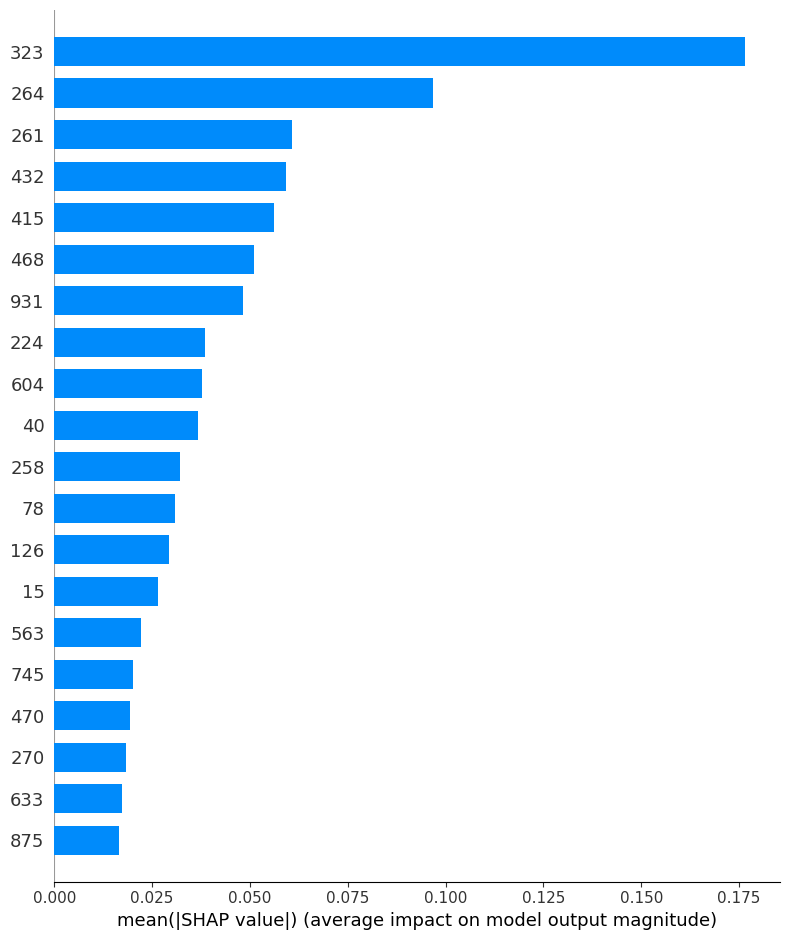

In [8]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

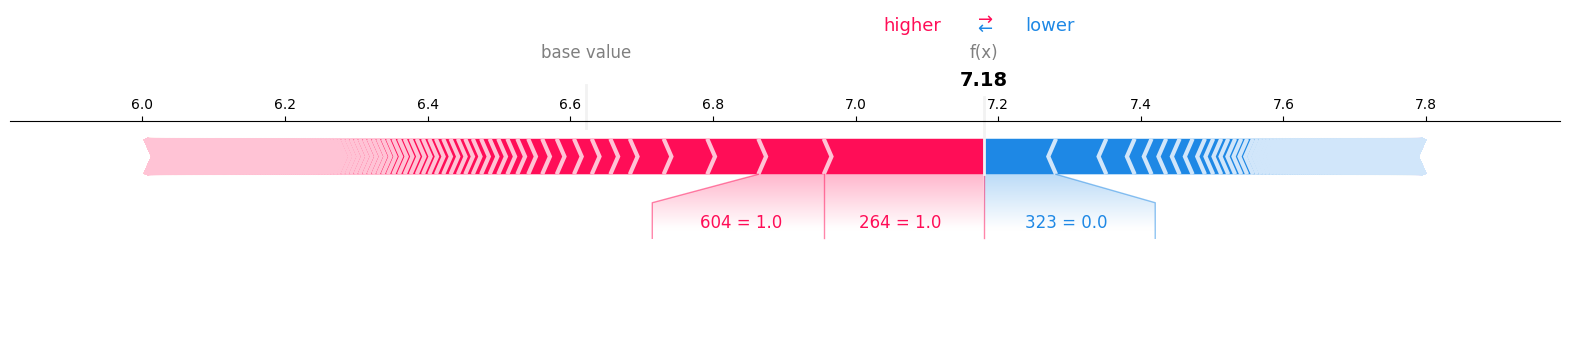

In [9]:
# Choose a specific test index
idx = 0

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_test.iloc[idx],
    matplotlib=True
)